<a href="https://colab.research.google.com/github/Arturo2711/A-non-traditional-linear-regression/blob/main/P4PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PSO Linear Regression

## Get the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/MachineLearning/DataSets/Salary.csv')

## We take a look on the structure

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [ ]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


Another way to get feel of the data is to plot a histogram for each field

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

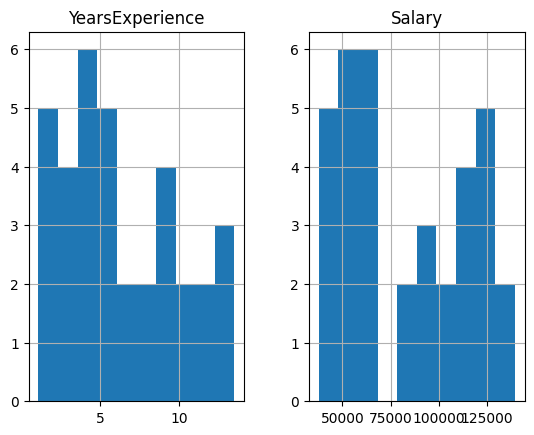

In [ ]:
df.hist()

## Visualize the data to gain insights

<Axes: xlabel='YearsExperience', ylabel='Salary'>

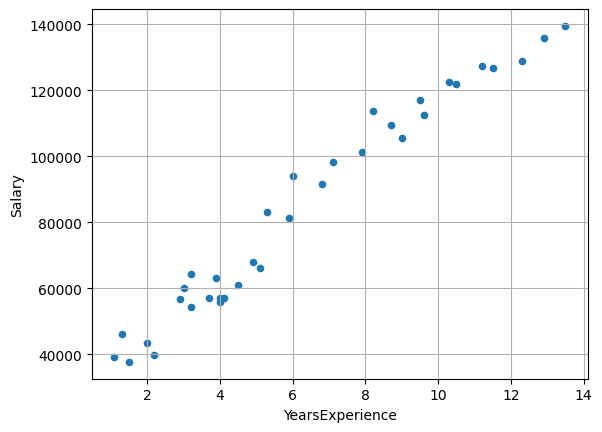

In [ ]:
df.plot(kind='scatter', x = 'YearsExperience', y = 'Salary', grid = True)

Setting the alpha option makes easier to visualize the density

<Axes: xlabel='YearsExperience', ylabel='Salary'>

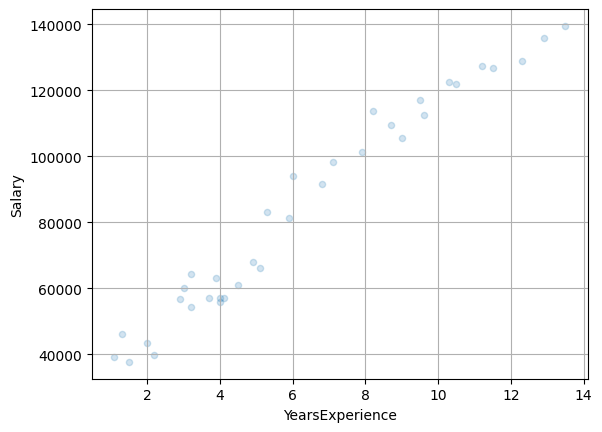

In [ ]:
df.plot(kind='scatter', x = 'YearsExperience', y = 'Salary', grid = True, alpha = 0.2)

Map the field of years of experience to a bar colors to gain more insights.

<Axes: xlabel='YearsExperience', ylabel='Salary'>

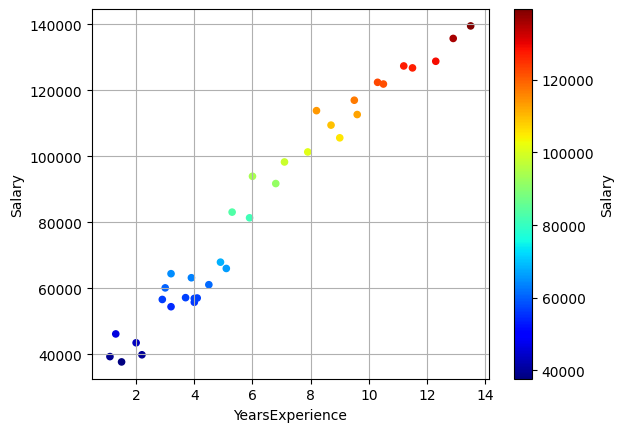

In [ ]:
df.plot.scatter(x = 'YearsExperience', y = 'Salary', grid=True,cmap="jet",colorbar=True, c='Salary')

##Look for correlations

In [ ]:
corr_matrix = df.corr()

The correlation coefficient indicates that there is a strong correlation with the attribute we want to predict

In [ ]:
corr_matrix['YearsExperience'].sort_values(ascending=False)

YearsExperience    1.000000
Salary             0.982427
Name: YearsExperience, dtype: float64

## Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
scaled = min_max_scaler.fit_transform(df)

In [ ]:
df_scaled = pd.DataFrame(scaled, columns=df.columns)

In [ ]:
X_test = df_scaled['YearsExperience']
y_test = df_scaled['Salary']

In [ ]:
df_scaled.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,0.420046,0.454269
std,0.291823,0.316145
min,0.000000,0.000000
25%,0.189516,0.189592
50%,0.338710,0.428883
75%,0.657258,0.742058
max,1.000000,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

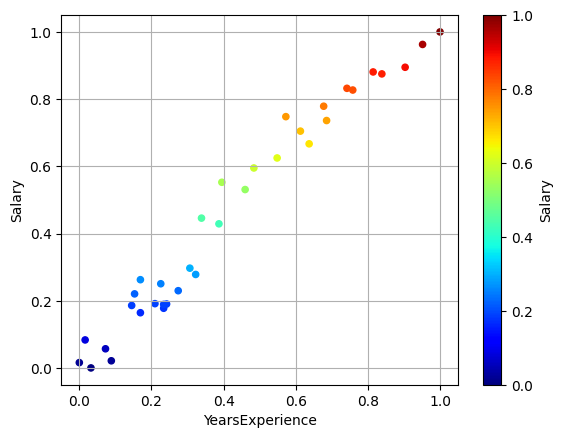

In [ ]:
df_scaled.plot.scatter(x = 'YearsExperience', y = 'Salary', grid=True,cmap="jet",colorbar=True, c='Salary')

# PSO algortihm

## Benchmark functions

Benchmark

In [ ]:
import math

########### FUNCTIONS ###############

def ackley(vector):
    sumatoria1 = 0
    sumatoria2 = 0
    for i in vector:
        sumatoria1 += i**2
        sumatoria2 += math.cos(2 * math.pi * i)
    primerTermino = math.exp(-0.2 * math.sqrt(1/len(vector) * sumatoria1))
    segundoTermino = math.exp(1/len(vector) * sumatoria2)
    return -20 * primerTermino - segundoTermino + 20 + math.exp(1)

def rastrigin(vector):
   summation = 0
   for xi in vector:
      summation += xi ** 2 - 10 * math.cos(2 * math.pi * xi)
   return summation + 10 * len(vector)

def griewank(vector):
    summation = 0
    product = 1
    for i, xi in enumerate(vector):
        summation += xi ** 2
        product *= math.cos(xi / math.sqrt(i + 1))
    return 1 / 4000 * summation - product + 1

def rosenbrock(vector):
   summation = 0
   for i, xi in enumerate(vector[:len(vector) - 1]):
      firstTerm = 100 * (vector[i+1] - xi**2)**2
      secondTerm = (xi - 1)**2
      summation += firstTerm + secondTerm
   return summation


PSO

In [ ]:
import random

########### FUNCTIONS FOR PSO ###########

def init_Population(number_of_particles, dimension, inf, sup):
    particles = []
    for _ in range(number_of_particles):
        xi = [random.uniform(inf, sup) for _ in range(dimension)]
        vi = [0.0 for _ in range(dimension)]
        particle_i = (xi, vi, xi)
        particles.append(particle_i)
    return particles

def g_Best(particles, fun):
    gBest = particles[0][0]
    for particle in particles:
        if fun(particle[0]) < fun(gBest):
            gBest = particle[0]
    return gBest

def update_Particles(particles, c1, c2, gBest, w_min, w_max, fun):
    new_particles = []
    for particle in particles:
        x_i, v_i, p_best_i = particle
        r1, r2, w = random.uniform(0, 1), random.uniform(0, 1), random.uniform(w_min, w_max)

        v_new = [w * v_i[i] + c1 * r1 * (p_best_i[i] - x_i[i]) + c2 * r2 * (gBest[i] - x_i[i]) for i in range(len(x_i))]
        x_new = [x_i[i] + v_new[i] for i in range(len(v_new))]

        if fun(x_new) < fun(p_best_i):
            p_best_new = x_new
        else:
            p_best_new = p_best_i

        particle_new = (x_new, v_new, p_best_new)
        new_particles.append(particle_new)
    return new_particles

def pso(number_of_particles, dimension, gen, lim_inf, lim_sup, w_min, w_max, c1, c2, fun):
    particles = init_Population(number_of_particles, dimension, lim_inf, lim_sup)
    gBest = g_Best(particles, fun)
    t = 0
    while t < gen:
        particles = update_Particles(particles, c1, c2, gBest, w_min, w_max, fun)
        gBest = g_Best(particles, fun)
        t += 1
    return gBest

## Test algorithm for some benchmark functions

In [ ]:
number_of_particles = 100
gen = 5000
dimension = 10
inf, sup = -10, 10
w_min, w_max = 0.5, 1.0
c1, c2 = 1.0, 2.0
fun = rosenbrock
sol = pso(number_of_particles, dimension, gen, inf, sup, w_min, w_max, c1, c2, fun)
print(f"Mejor solución encontrada: {(fun(sol), sol)}")

Mejor solución encontrada: (0.2795435303797793, [0.9799341548836267, 1.00011595448943, 1.0021541545454755, 1.0109454984649582, 1.014187602374726, 1.0257373165381798, 1.0605525599765053, 1.1294064136337783, 1.2781491232304616, 1.6332812853696428])


## Linear Regression

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


def mse(vector):
    theta = vector[0]
    bias = vector[1]
    y_pred = X_test * theta + bias # Bias es la ordenada al origen
    return mean_squared_error(y_test, y_pred)

def main():
    number_of_particles = 20
    gen = 100
    dimension = 2
    inf, sup = 0, 1
    w_min, w_max = 0.5, 1.0
    c1, c2 = 1.0, 2.0
    fun = mse
    sol = pso(number_of_particles, dimension, gen, inf, sup, w_min, w_max, c1, c2, fun)
    print(f"Mejor solución encontrada: {(fun(sol), sol)}")

main()

Mejor solución encontrada: (0.0033823648381547276, [1.0641392926435618, 0.00733578172497813])


## Resultado

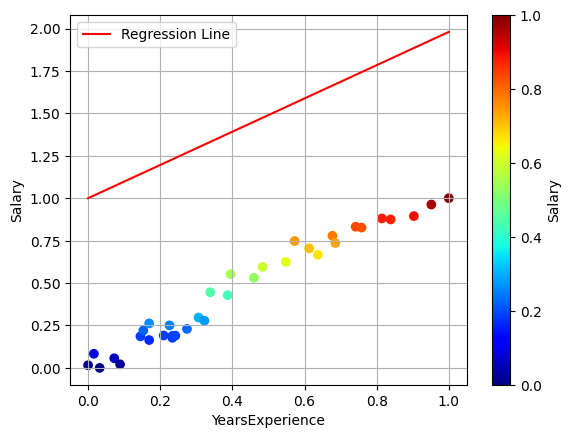

In [ ]:
    scatter = plt.scatter(df_scaled['YearsExperience'], df_scaled['Salary'], c=df_scaled['Salary'], cmap='jet')
    plt.colorbar(scatter, label='Salary')
    plt.xlabel('YearsExperience')
    plt.ylabel('Salary')
    plt.grid(True)

    # Calcular y plotear la línea de regresión
    years_experience = df_scaled['YearsExperience']
    predicted_salary = sol[0] * years_experience + sol[1]
    plt.plot(years_experience, predicted_salary, color='red', label='Regression Line')
    plt.legend()
    plt.show()